In [164]:
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [165]:
scores = pd.read_csv('scores.csv')

In [166]:
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,10-Jun,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,10-Jun,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,10-Jun,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,15-Nov,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,15-Nov,2.0,2.0,26.0,26.0
5,condition_6,7,1,37,2.0,2.0,2.0,10-Jun,1.0,2.0,18.0,15.0
6,condition_7,11,1,22,1.0,2.0,2.0,15-Nov,2.0,1.0,24.0,25.0
7,condition_8,5,2,27,2.0,2.0,2.0,15-Nov,1.0,2.0,20.0,16.0
8,condition_9,13,2,47,1.0,2.0,2.0,10-Jun,1.0,2.0,26.0,26.0
9,condition_10,9,2,47,2.0,2.0,2.0,10-Jun,1.0,2.0,28.0,21.0


In [167]:
scores1 = scores.drop(labels=range(23, 55), axis=0)

In [168]:
scores1

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,10-Jun,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,10-Jun,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,10-Jun,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,15-Nov,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,15-Nov,2.0,2.0,26.0,26.0
5,condition_6,7,1,37,2.0,2.0,2.0,10-Jun,1.0,2.0,18.0,15.0
6,condition_7,11,1,22,1.0,2.0,2.0,15-Nov,2.0,1.0,24.0,25.0
7,condition_8,5,2,27,2.0,2.0,2.0,15-Nov,1.0,2.0,20.0,16.0
8,condition_9,13,2,47,1.0,2.0,2.0,10-Jun,1.0,2.0,26.0,26.0
9,condition_10,9,2,47,2.0,2.0,2.0,10-Jun,1.0,2.0,28.0,21.0


In [169]:
scores1.edu = scores1['edu'].replace('10-Jun', np.float('1'))
scores1

C:\Users\iance\AppData\Local\Temp\ipykernel_19124\2565887028.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  scores1.edu = scores1['edu'].replace('10-Jun', np.float('1'))


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,1.0,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,1.0,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,1.0,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,15-Nov,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,15-Nov,2.0,2.0,26.0,26.0
5,condition_6,7,1,37,2.0,2.0,2.0,1.0,1.0,2.0,18.0,15.0
6,condition_7,11,1,22,1.0,2.0,2.0,15-Nov,2.0,1.0,24.0,25.0
7,condition_8,5,2,27,2.0,2.0,2.0,15-Nov,1.0,2.0,20.0,16.0
8,condition_9,13,2,47,1.0,2.0,2.0,1.0,1.0,2.0,26.0,26.0
9,condition_10,9,2,47,2.0,2.0,2.0,1.0,1.0,2.0,28.0,21.0


In [170]:
scores1.edu = scores1['edu'].replace('15-Nov', np.float('2'))
scores1

C:\Users\iance\AppData\Local\Temp\ipykernel_19124\3864623142.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  scores1.edu = scores1['edu'].replace('15-Nov', np.float('2'))


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,1.0,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,1.0,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,1.0,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,2.0,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,2.0,2.0,2.0,26.0,26.0
5,condition_6,7,1,37,2.0,2.0,2.0,1.0,1.0,2.0,18.0,15.0
6,condition_7,11,1,22,1.0,2.0,2.0,2.0,2.0,1.0,24.0,25.0
7,condition_8,5,2,27,2.0,2.0,2.0,2.0,1.0,2.0,20.0,16.0
8,condition_9,13,2,47,1.0,2.0,2.0,1.0,1.0,2.0,26.0,26.0
9,condition_10,9,2,47,2.0,2.0,2.0,1.0,1.0,2.0,28.0,21.0


In [171]:
scores1.edu = scores1['edu'].replace('16-20', np.float('3'))
scores1

C:\Users\iance\AppData\Local\Temp\ipykernel_19124\3527348642.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  scores1.edu = scores1['edu'].replace('16-20', np.float('3'))


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,1.0,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,1.0,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,1.0,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,2.0,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,2.0,2.0,2.0,26.0,26.0
5,condition_6,7,1,37,2.0,2.0,2.0,1.0,1.0,2.0,18.0,15.0
6,condition_7,11,1,22,1.0,2.0,2.0,2.0,2.0,1.0,24.0,25.0
7,condition_8,5,2,27,2.0,2.0,2.0,2.0,1.0,2.0,20.0,16.0
8,condition_9,13,2,47,1.0,2.0,2.0,1.0,1.0,2.0,26.0,26.0
9,condition_10,9,2,47,2.0,2.0,2.0,1.0,1.0,2.0,28.0,21.0


In [194]:
X = scores1.drop(columns = ['madrs2', 'madrs1', 'number'])
y = scores1['madrs1']


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=123)

In [196]:
X_train.head()

,days,gender,age,afftype,melanch,inpatient,edu,marriage,work
6,11,1,22,1.0,2.0,2.0,2.0,2.0,1.0
21,14,1,67,2.0,2.0,1.0,1.0,2.0,2.0
2,13,1,47,2.0,2.0,2.0,1.0,2.0,2.0
13,14,1,62,1.0,2.0,2.0,1.0,2.0,2.0


In [175]:
from sklearn import tree
import matplotlib.pyplot as plt
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[2] <= 37.0\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

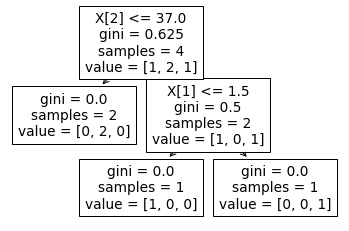

In [176]:
tree.plot_tree(tree_clf)

In [177]:
lr_classifier = LinearRegression()
lr_classifier.fit(X_train, y_train)

LinearRegression()

In [178]:
y_pred = lr_classifier.predict(X_test)
import math
print("MSE", mean_squared_error(y_test, y_pred))

MSE 59.0202987034722


In [179]:
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 7.68246696728806
